### Multi-class classification

Multi-class classification problems are those where the outcome variable takes three or more classes. For example:

- Y represents the risk of defaulting for a customer and it takes the values: low risk, medium risk, or high risk.

- Y represents the medical condition of distressed patients in an Emergency Room and it takes the values: stroke, drug overdose, or epileptic seizure.

### Multi-class Logistic Regression

In a multi-class problem where __Y has three or more classes__, we use the logistic regression model to predict the class of Y for which the posterior probability is the highest.

Predict Y= k, for the class k for which __the following is maximum__:

__P (Y=k | the values of the predictors)__

Where,

P (Y=k | the values of the predictors) = One logistic regression model WITH DIFFERENT COEFFICIENTS for each class k (see next figure)

<br>

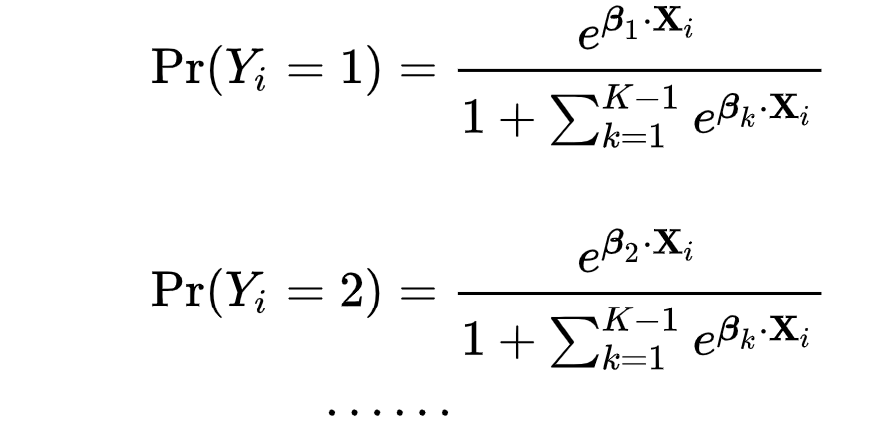

Where,

Xi is a vector with the set of explanatory variables associated with observation i

B1 is the set of regression coefficients associated with class 1 (Bo1 + B11 + B21 +... + Bp1)

B2 is the set of regression coefficients associated with class 2 (Bo2 + B12 + B22 +... + Bp2)

...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing important libraries

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Importing the method to apply logistic regression

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

### Exploring multiclass logistic regression in scikit-learn 

### The iris dataset

In [ ]:
from sklearn import datasets

In [ ]:
iris_data=datasets.load_iris()

In [ ]:
iris_df=pd.DataFrame(iris_data.data, columns= iris_data.feature_names)

In [ ]:
iris_df['Y']= iris_data.target

In [ ]:
iris_df.info()

In [ ]:
# How many observations for each class of Y?

iris_df['Y'].value_counts()

In [ ]:
# How are the classes of Y called?

iris_data.target_names

Y=0 (iris type is setosa)

Y=1 (iris type is versicolor)

Y=2 (iris type is virginica)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split (iris_df.iloc[:,:-1], iris_df['Y'], test_size=0.2, random_state=1)

Applying multi-class logistic regression is not very different than applying binary logistic regression. In both cases we use the method LogisticRegression(). The only additional step is to set the multi_class parameter= 'multinomial'.

<br>

In [ ]:
logistic_model_iris= LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter= 1000, random_state= 1)

# The ‘lbfgs’ solver is the default one

In [ ]:
logistic_model_iris.fit(X_train, y_train)

What is the logistic model obtained after applying the LogisticRegression() method?

Let's take a look at the coefficients and the intercept:

In [ ]:
logistic_model_iris.coef_

In [ ]:
logistic_model_iris.coef_.shape

The first row contains the coefficients for the four predictors to predict the probability that Y= 0 (setosa)

The second row contains the coefficients for the four predictors to predict the probability that Y= 1 (versicolor)

The third row contains the coefficients for the four predictors to predict the probability that Y= 2 (virginica)

In [ ]:
logistic_model_iris.intercept_

In [ ]:
logistic_model_iris.intercept_.shape

Let's use the logistic model to predict Y for the test observations:

In [ ]:
y_pred_iris = logistic_model_iris.predict(X_test)
y_pred_iris

In [ ]:
0.2*150

In [ ]:
y_pred_iris.size

In [ ]:
y_test

The predict() method predicts the Y class for which the posterior probability is highest. Next cells show this to be the case:


In [ ]:
# Posterior probabilities

logistic_model_iris.predict_proba(X_test)

How do we interpret these posterior probabilities?

In [ ]:
logistic_model_iris.predict_proba(X_test).shape

30 tests observations and 3 probabilities for each observation, that is:

P1= P(Y=0), P2= P(Y=1), P3= P(Y=2)

In [ ]:
# Get the max probability for each row (i.e., for each observation):

np.max(logistic_model_iris.predict_proba(X_test), axis=1)

In [ ]:
# Get the index for which the max happens for each row (i.e., for each observation)

np.argmax(logistic_model_iris.predict_proba(X_test), axis=1)

What does the first zero mean? It means that for the first row, the max is the first probability (index 0)

What does the second one mean? It means that for the second row, the max is the second probability (index 1)

and so on...

In this example, it turns out that the index of the columns where the max occurs coincide with the class of Y that you want to predict. In other words, if the index where the max occurs is zero, you want to predict the first class, which is Y=0. MAKE SENSE????

In [ ]:
y_pred_iris_fromindex= np.argmax(logistic_model_iris.predict_proba(X_test), axis=1)

In [ ]:
np.all(y_pred_iris_fromindex == y_pred_iris)

LET'S GET SOME METRICS TO EVALUATE THE QUALITY OF THE PREDICTIONS

In [ ]:
confusion_matrix(y_test,y_pred_iris)

In [ ]:
12/13

In [ ]:
iris_data.target_names

In [ ]:
y_pred_iris

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,y_pred_iris))

### A second example of multiclass logistic regression in scikit-learn 

### The digits dataset

__Goal with the digits dataset__:Train a classifier to classify hand written digits (i.e., find out if a hand written digit is a 0, 1, ..., or a 9).

Each observation is a 8x8 image of a digit.


The outcome variable takes nine different categories, the numbers 0,1,2,...9.


Visit the following webpage for more infor about the dataset:

https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Each observation represents an 8x8 input matrix= a matrix with 64 cells. 

Each cell in the matrix is a predictor in the the data frame. Thus, there are 64 predictors and the value of each predictor is an integer in the range from 0 to 16 that represents the number of pixels in the cell.

Zero represents black and 16 represents white (in between 0 and 16 we have gray colors (closer to zero we have darker gray and closer to 16 ligther gray))

In [ ]:
from sklearn import datasets

In [ ]:
digits_data=datasets.load_digits()

In [ ]:
digits_df=pd.DataFrame(digits_data.data, columns= digits_data.feature_names)

In [ ]:
digits_df['Y']= digits_data.target

In [ ]:
digits_df.shape

We have 1797 images to classify and 65 variables (64 predictors and the outcome)

In [ ]:
digits_df.head()

In [ ]:
# Checking that the value of each predictor ranges from 0 to 16

for i in np.arange(64):
    print (digits_df.columns[i], ": ", digits_df.iloc[:,i].min(), digits_df.iloc[:,i].max())

In [ ]:
# Checking that the classes are the numbers from 1 to 9

digits_df['Y'].unique()

The digits_data object (not the dataframe, the object we read before we converted it into a dataframe), have useful properties. See next:

In [ ]:
digits_data.keys()

We can plot each of the images. For example, let's plot the first image (the one at index 0)

In [ ]:
plt.gray()
plt.matshow(digits_data.images[0])
plt.show()

In [ ]:
# Plot the first five images:

plt.gray()
for i in np.arange(5):
    plt.matshow(digits_data.images[i])
    plt.show()

##### Applying Multi-class Log Reg to the digits dataset

In [ ]:
X_train_di, X_test_di, y_train_di, y_test_di= train_test_split (digits_df.iloc[:,:-1], digits_df['Y'], test_size=0.2, random_state=1)

__Standardizing the predictors__

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe_digits = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter= 1000, random_state= 1))

In [ ]:
pipe_digits.fit(X_train_di, y_train_di)

In [ ]:
y_pred_digits= pipe_digits.predict(X_test_di)

In [ ]:
confusion_matrix (y_test_di, y_pred_digits)

In [ ]:
print(classification_report(y_test_di,y_pred_digits))

### An example of multiclass logistic regression TO DO AT HOME !!!

### The penguins dataset

Download the penguins dataset from Blackboard (it is a csv file) and then read it as Pandas DF in this jupyter notebook

The goal is to predict a penguin's species based on physical characterists such as body mass, flipper length, etc

There are three species: Adelie, Gentoo, and Chinstrap

In your analysis, __exclude the following columns (i.e., do not use them as predictors__): island, sex, and year (the year the data point was collected)